In [9]:
# Imports
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
import os

In [111]:
# Paramètres du modèle
Tc0 = 30 

scenarios = [
    {"Ta": 20, "ws": 2, "I": 100},
    {"Ta": 30, "ws": 1, "I": 2500}
]

# Paramètres de simulation
dt = 0.1
T_total = 30 * 60  # 30 minutes
N = int(T_total / dt)
t_vals = np.linspace(0, T_total, N + 1)

In [112]:
# Fonction
def dTc_dt(Tc, t, Ta, ws, I):
    facteur = (- ((ws ** 2) / 1600) * 0.4) - 0.1
    droite = (Tc - Ta - (((I ** 1.4) / 73785) * 130))
    return (facteur * droite) / 60

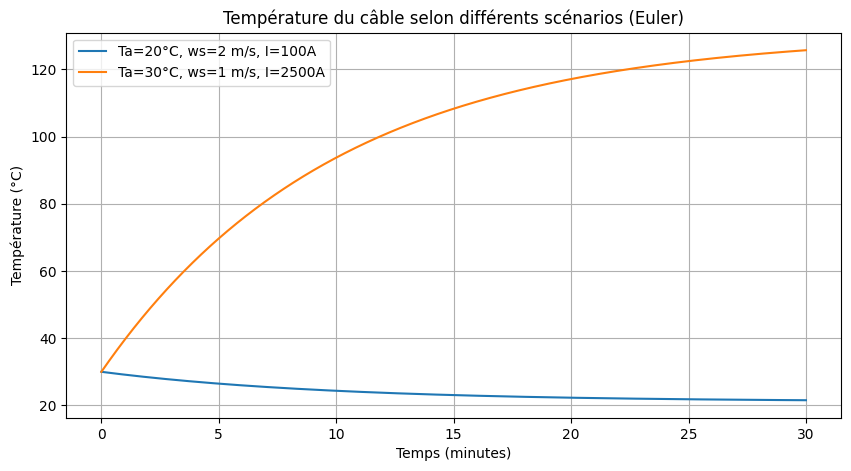

In [113]:
# Mesure du temps et ressources
start_time = time.time()
start_cpu = psutil.Process(os.getpid()).cpu_times().user
start_mem = psutil.Process(os.getpid()).memory_info().rss

# Figure sans odeint
plt.figure(figsize=(10, 5))

for sc in scenarios:
    Tc_vals = np.zeros(N+1)
    Tc_vals[0] = Tc0
    for n in range(N):
        Tc_vals[n+1] = Tc_vals[n] + dt * dTc_dt(Tc_vals[n], t_vals, sc["Ta"], sc["ws"], sc["I"])
    plt.plot(t_vals / 60, Tc_vals, label=f'Ta={sc["Ta"]}°C, ws={sc["ws"]} m/s, I={sc["I"]}A')

end_time = time.time()
end_cpu = psutil.Process(os.getpid()).cpu_times().user
end_mem = psutil.Process(os.getpid()).memory_info().rss

plt.xlabel("Temps (minutes)")
plt.ylabel("Température (°C)")
plt.title("Température du câble selon différents scénarios (Euler)")
plt.legend()
plt.grid()
plt.show()

In [114]:
print(f"Temps d'exécution : {end_time - start_time:.4f} s")
print(f"Temps CPU utilisé : {end_cpu - start_cpu:.4f} s")
print(f"Mémoire utilisée : {(end_mem - start_mem) / (1024**2):.2f} MB")

Temps d'exécution : 0.0848 s
Temps CPU utilisé : 0.0312 s
Mémoire utilisée : 2.29 MB


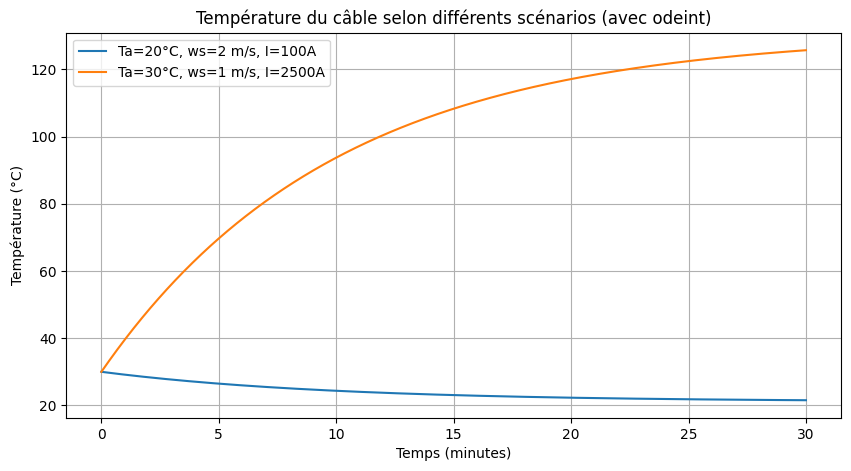

In [115]:
# Mesure du temps et ressources
start_time = time.time()
start_cpu = psutil.Process(os.getpid()).cpu_times().user
start_mem = psutil.Process(os.getpid()).memory_info().rss

# Figure avec odeint
plt.figure(figsize=(10, 5))

for sc in scenarios:
    sol = odeint(dTc_dt, Tc0, t_vals, args=(sc["Ta"], sc["ws"], sc["I"]))
    plt.plot(t_vals / 60, sol[:, 0], label=f'Ta={sc["Ta"]}°C, ws={sc["ws"]} m/s, I={sc["I"]}A')

end_time = time.time()
end_cpu = psutil.Process(os.getpid()).cpu_times().user
end_mem = psutil.Process(os.getpid()).memory_info().rss

plt.xlabel("Temps (minutes)")
plt.ylabel("Température (°C)")
plt.title("Température du câble selon différents scénarios (avec odeint)")
plt.legend()
plt.grid()
plt.show()

In [116]:
print(f"Temps d'exécution : {end_time - start_time:.4f} s")
print(f"Temps CPU utilisé : {end_cpu - start_cpu:.4f} s")
print(f"Mémoire utilisée : {(end_mem - start_mem) / (1024**2):.2f} MB")

Temps d'exécution : 0.0137 s
Temps CPU utilisé : 0.0000 s
Mémoire utilisée : 1.03 MB


In [117]:
# Nouvelle simulation pour optimiser la mémoire
def solve_temperature(Tc: float, Ta: float, ws: float, I: float):
    dt = 1e-6
    T_total = 30 * 60
    N = int(T_total / dt)

    temps_initial = 0.0
    minute_interval = 60

    next_minute = 0
    resultats_minutes = []
    resultats_temperatures = []

    for i in tqdm(range(N)):
        Tc += dt * dTc_dt(Tc, temps_initial, Ta, ws, I)
        temps_initial += dt

        if temps_initial >= next_minute:
            resultats_minutes.append(int(temps_initial / 60))
            resultats_temperatures.append(Tc)
            next_minute += minute_interval

    return resultats_minutes, resultats_temperatures

# Mesure du temps et ressources
start_time = time.time()
start_cpu = psutil.Process(os.getpid()).cpu_times().user
start_mem = psutil.Process(os.getpid()).memory_info().rss

minutes, temperatures = solve_temperature(30, 20, 2, 100)
print("Minutes:", minutes)
print("Températures:", temperatures)

end_time = time.time()
end_cpu = psutil.Process(os.getpid()).cpu_times().user
end_mem = psutil.Process(os.getpid()).memory_info().rss

print(f"Temps d'exécution : {end_time - start_time:.4f} s")
print(f"Temps CPU utilisé : {end_cpu - start_cpu:.4f} s")
print(f"Mémoire utilisée : {(end_mem - start_mem) / (1024**2):.2f} MB")

100%|██████████| 1800000000/1800000000 [14:16<00:00, 2101600.42it/s]

Minutes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Températures: [29.999999985037974, 29.14612492873398, 28.374279059449293, 27.67658208196601, 27.04591073712803, 26.475826075683596, 25.96050771870499, 25.494694433420335, 25.073630411060783, 24.69301673899167, 24.34896746806943, 24.037969967168547, 23.75684905298255, 23.50273457243675, 23.273032095718413, 23.065396442932386, 22.877707717590713, 22.70804967886852, 22.554690187960972, 22.416063479029997, 22.290754216121297, 22.17748303093215, 22.075093465561523, 21.982540154118237, 21.898878156296718, 21.823253313309355, 21.754893518826687, 21.69310084077212, 21.637244398212104, 21.58675391409285, 21.541113896393814]
Temps d'exécution : 856.4936 s
Temps CPU utilisé : 573.5312 s
Mémoire utilisée : -42.91 MB


In [2]:
from functools import lru_cache
from tqdm import tqdm

In [119]:
MINUTES = 30
SECONDES = 60
PAS_DE_TEMPS = 1e-6

def simulate_temperature_loop(Tc, N_etapes, Ta, ws, I):
    temps_initial = 0.0

    facteur_vent = (- ((ws ** 2) / 1600.0) * 0.4) - 0.1
    facteur_intensite = (((I ** 1.4) / 73785.0) * 130)

    next_minute = 0
    resultats_minutes = []
    resultats_temperatures = []

    for i in tqdm(range(N_etapes+1)):
        droite = (Tc - Ta - facteur_intensite)
        Tc += PAS_DE_TEMPS * (facteur_vent * droite) / 60.0
        temps_initial += PAS_DE_TEMPS

        if temps_initial >= next_minute:
            resultats_minutes.append(int(temps_initial / 60))
            resultats_temperatures.append(Tc)
            next_minute += SECONDES

    return resultats_minutes, resultats_temperatures

@lru_cache(maxsize=None)
def solve_temperature(Tc: float, Ta: float, ws: float, I: float):
    Temps_total = MINUTES * SECONDES
    N_etapes = int(Temps_total / PAS_DE_TEMPS) # 1.8 milliard de pas de temps pour 1e-6 secondes
    return simulate_temperature_loop(Tc, N_etapes, Ta, ws, I)

# Mesure du temps et ressources
start_time = time.time()
start_cpu = psutil.Process(os.getpid()).cpu_times().user
start_mem = psutil.Process(os.getpid()).memory_info().rss

minutes, temperatures = solve_temperature(30, 20, 2, 100)
print("Minutes:", minutes)
print("Températures:", temperatures)

end_time = time.time()
end_cpu = psutil.Process(os.getpid()).cpu_times().user
end_mem = psutil.Process(os.getpid()).memory_info().rss

print(f"Temps d'exécution : {end_time - start_time:.4f} s")
print(f"Temps CPU utilisé : {end_cpu - start_cpu:.4f} s")
print(f"Mémoire utilisée : {(end_mem - start_mem) / (1024**2):.2f} MB")

100%|██████████| 1800000001/1800000001 [06:02<00:00, 4971731.18it/s]

Minutes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Températures: [29.999999985037974, 29.14612492873398, 28.374279059449293, 27.67658208196601, 27.04591073712803, 26.475826075683596, 25.96050771870499, 25.494694433420335, 25.073630411060783, 24.69301673899167, 24.34896746806943, 24.037969967168547, 23.75684905298255, 23.50273457243675, 23.273032095718413, 23.065396442932386, 22.877707717590713, 22.70804967886852, 22.554690187960972, 22.416063479029997, 22.290754216121297, 22.17748303093215, 22.075093465561523, 21.982540154118237, 21.898878156296718, 21.823253313309355, 21.754893518826687, 21.69310084077212, 21.637244398212104, 21.58675391409285, 21.541113896393814]
Temps d'exécution : 362.0492 s
Temps CPU utilisé : 211.2500 s
Mémoire utilisée : -1.11 MB


In [14]:
from numba import njit

In [127]:
MINUTES = 30
SECONDES = 60
PAS_DE_TEMPS = 1e-6

@njit
def simulate_temperature_loop(Tc, N_etapes, Ta, ws, I):
    temps_initial = 0.0

    facteur_vent = (- ((ws ** 2) / 1600.0) * 0.4) - 0.1
    facteur_intensite = (((I ** 1.4) / 73785.0) * 130)

    next_minute = 0
    resultats_minutes = np.zeros(31, dtype=np.int32)
    resultats_temperatures = np.zeros(31, dtype=np.float64)
    idx = 0

    for i in range(N_etapes+1):
        droite = (Tc - Ta - facteur_intensite)
        Tc += PAS_DE_TEMPS * (facteur_vent * droite) / 60.0
        temps_initial += PAS_DE_TEMPS

        if temps_initial >= next_minute:
            resultats_minutes[idx] = int(temps_initial / 60)
            resultats_temperatures[idx] = Tc
            next_minute += SECONDES
            idx += 1

    return resultats_minutes, resultats_temperatures

def solve_temperature(Tc: float, Ta: float, ws: float, I: float):
    Temps_total = MINUTES * SECONDES
    N_etapes = int(Temps_total / PAS_DE_TEMPS) # 1.8 milliard de pas de temps pour 1e-6 secondes
    return simulate_temperature_loop(Tc, N_etapes, Ta, ws, I)

# Mesure du temps et ressources
start_time = time.time()
start_cpu = psutil.Process(os.getpid()).cpu_times().user
start_mem = psutil.Process(os.getpid()).memory_info().rss

minutes, temperatures = solve_temperature(30, 20, 2, 100)
print("Minutes:", minutes)
print("Températures:", temperatures)

end_time = time.time()
end_cpu = psutil.Process(os.getpid()).cpu_times().user
end_mem = psutil.Process(os.getpid()).memory_info().rss

print(f"Temps d'exécution : {end_time - start_time:.4f} s")
print(f"Temps CPU utilisé : {end_cpu - start_cpu:.4f} s")
print(f"Mémoire utilisée : {(end_mem - start_mem) / (1024**2):.2f} MB")


Minutes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Températures: [29.99999999 29.14612493 28.37427906 27.67658208 27.04591074 26.47582608
 25.96050772 25.49469443 25.07363041 24.69301674 24.34896747 24.03796997
 23.75684905 23.50273457 23.2730321  23.06539644 22.87770772 22.70804968
 22.55469019 22.41606348 22.29075422 22.17748303 22.07509347 21.98254015
 21.89887816 21.82325331 21.75489352 21.69310084 21.6372444  21.58675391
 21.5411139 ]
Temps d'exécution : 14.5002 s
Temps CPU utilisé : 10.8438 s
Mémoire utilisée : 0.27 MB


In [ ]:
# Pure python (for loop)

from codecarbon import EmissionsTracker

MINUTES = 30
SECONDES = 60
PAS_DE_TEMPS = 1e-6

def simulate_temperature_loop(Tc, N_etapes, Ta, ws, I):
    temps_initial = 0.0

    facteur_vent = (- ((ws ** 2) / 1600.0) * 0.4) - 0.1
    facteur_intensite = (((I ** 1.4) / 73785.0) * 130)

    next_minute = 0
    resultats_minutes = np.zeros(31, dtype=np.int32)
    resultats_temperatures = np.zeros(31, dtype=np.float64)
    idx = 0

    for i in range(N_etapes+1):
        droite = (Tc - Ta - facteur_intensite)
        Tc += PAS_DE_TEMPS * (facteur_vent * droite) / 60.0
        temps_initial += PAS_DE_TEMPS

        if temps_initial >= next_minute:
            resultats_minutes[idx] = int(temps_initial / 60)
            resultats_temperatures[idx] = Tc
            next_minute += SECONDES
            idx += 1

    return resultats_minutes, resultats_temperatures

def solve_temperature(Tc: float, Ta: float, ws: float, I: float):
    Temps_total = MINUTES * SECONDES
    N_etapes = int(Temps_total / PAS_DE_TEMPS) # 1.8 milliard de pas de temps pour 1e-6 secondes
    return simulate_temperature_loop(Tc, N_etapes, Ta, ws, I)

tracker = EmissionsTracker(save_to_file=False, log_level="error")
tracker.start()
_, temps = solve_temperature(25, 20, 1, 100)
tracker.stop()

print(f"Durée : {tracker.final_emissions_data.duration} s")
print(f"Emissions de CO2 : {tracker.final_emissions_data.emissions} kg")
print(f"Énergie CPU : {tracker.final_emissions_data.cpu_energy} kWh")
print(f"Énergie GPU : {tracker.final_emissions_data.gpu_energy} kWh")
print(f"Énergie RAM : {tracker.final_emissions_data.ram_energy} kWh")
print(f"Températures : {list(map(lambda t: round(t, 2), temps))}")

  1%|          | 19645446/1800000001 [00:11<16:42, 1775494.17it/s]


KeyboardInterrupt: 

In [ ]:
# prévision 30*1

from codecarbon import EmissionsTracker

MINUTES = 30
SECONDES = 60
PAS_DE_TEMPS = 1e-6

def simulate_temperature_loop(Tc, Ta, ws, I):
    facteur_vent = (- ((ws ** 2) / 1600.0) * 0.4) - 0.1
    facteur_intensite = (((I ** 1.4) / 73785.0) * 130)

    resultats_minutes = np.zeros(MINUTES + 1, dtype=np.int32)
    resultats_temperatures = np.zeros(MINUTES + 1, dtype=np.float64)

    idx = 0
    for minute in range(MINUTES + 1):
        for seconde in range(SECONDES):
            for _ in range(int(1 / PAS_DE_TEMPS)):
                droite = (Tc - Ta - facteur_intensite)
                Tc += PAS_DE_TEMPS * (facteur_vent * droite) / 60.0
        resultats_minutes[idx] = minute
        resultats_temperatures[idx] = Tc
        idx += 1

    return resultats_minutes, resultats_temperatures


def solve_temperature(Tc: float, Ta: float, ws: float, I: float):
    return simulate_temperature_loop(Tc, Ta, ws, I)


tracker = EmissionsTracker(save_to_file=False, log_level="error")
tracker.start()
_, temps = solve_temperature(25, 20, 1, 100)
tracker.stop()

print(f"Durée : {tracker.final_emissions_data.duration} s")
print(f"Emissions de CO2 : {tracker.final_emissions_data.emissions} kg")
print(f"Énergie CPU : {tracker.final_emissions_data.cpu_energy} kWh")
print(f"Énergie GPU : {tracker.final_emissions_data.gpu_energy} kWh")
print(f"Énergie RAM : {tracker.final_emissions_data.ram_energy} kWh")
print(f"Températures : {list(map(lambda t: round(t, 2), temps))}")

In [ ]:
# Scipy odeint

from codecarbon import EmissionsTracker

MINUTES = 30
SECONDES = 60

def temperature_model(Tc, t, Ta, ws, I):
    facteur_vent = (- ((ws ** 2) / 1600.0) * 0.4) - 0.1
    facteur_intensite = (((I ** 1.4) / 73785.0) * 130)
    droite = (Tc - Ta - facteur_intensite)
    dTc_dt = (facteur_vent * droite) / 60.0
    return dTc_dt

def solve_temperature_odeint(Tc_init, Ta, ws, I):
    Temps_total = MINUTES * SECONDES
    t = np.linspace(0, Temps_total, MINUTES + 1)

    Tc_solution = odeint(temperature_model, Tc_init, t, args=(Ta, ws, I))
    Tc_solution = Tc_solution.flatten()

    return t / 60, Tc_solution

tracker = EmissionsTracker(save_to_file=False, log_level="error")
tracker.start()
minutes, temperatures = solve_temperature_odeint(25, 20, 1, 100)
tracker.stop()

print(f"Durée : {tracker.final_emissions_data.duration} s")
print(f"Emissions de CO2 : {tracker.final_emissions_data.emissions} kg")
print(f"Énergie CPU : {tracker.final_emissions_data.cpu_energy} kWh")
print(f"Énergie GPU : {tracker.final_emissions_data.gpu_energy} kWh")
print(f"Énergie RAM : {tracker.final_emissions_data.ram_energy} kWh")
print(f"Températures : {list(map(lambda t: round(t, 2), temperatures))}")

In [ ]:
# cython

In [ ]:
# numba

from codecarbon import EmissionsTracker

MINUTES = 30
SECONDES = 60
PAS_DE_TEMPS = 1e-6

@njit
def simulate_temperature_loop(Tc, N_etapes, Ta, ws, I):
    temps_initial = 0.0

    facteur_vent = (- ((ws ** 2) / 1600.0) * 0.4) - 0.1
    facteur_intensite = (((I ** 1.4) / 73785.0) * 130)

    next_minute = 0
    resultats_minutes = np.zeros(31, dtype=np.int32)
    resultats_temperatures = np.zeros(31, dtype=np.float64)
    idx = 0

    for i in range(N_etapes+1):
        droite = (Tc - Ta - facteur_intensite)
        Tc += PAS_DE_TEMPS * (facteur_vent * droite) / 60.0
        temps_initial += PAS_DE_TEMPS

        if temps_initial >= next_minute:
            resultats_minutes[idx] = int(temps_initial / 60)
            resultats_temperatures[idx] = Tc
            next_minute += SECONDES
            idx += 1

    return resultats_minutes, resultats_temperatures

def solve_temperature(Tc: float, Ta: float, ws: float, I: float):
    Temps_total = MINUTES * SECONDES
    N_etapes = int(Temps_total / PAS_DE_TEMPS) # 1.8 milliard de pas de temps pour 1e-6 secondes
    return simulate_temperature_loop(Tc, N_etapes, Ta, ws, I)

tracker = EmissionsTracker(save_to_file=False, log_level="error")
tracker.start()
_, temps = solve_temperature(25, 20, 1, 100)
tracker.stop()

print(f"Durée : {tracker.final_emissions_data.duration} s")
print(f"Emissions de CO2 : {tracker.final_emissions_data.emissions} kg")
print(f"Énergie CPU : {tracker.final_emissions_data.cpu_energy} kWh")
print(f"Énergie GPU : {tracker.final_emissions_data.gpu_energy} kWh")
print(f"Énergie RAM : {tracker.final_emissions_data.ram_energy} kWh")
print(f"Températures : {list(map(lambda t: round(t, 2), temps))}")